## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.75, 0.95]
NESTEROV = [True, False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mmt in MOMENTUM:
    for nr in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nr, momentum=mmt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mmt-%s" % str(mmt) + "-nr-%s" % str(nr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0717 16:57:42.864366 4645504448 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 16:57:42.865247 4645504448 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 16:57:42.876548 4645504448 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 16:57:42.877273 4645504448 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9392 - acc: 0.3097 - val_loss: 1.8328 - val_acc: 0.3436
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7436 - acc: 0.3866 - val_loss: 1.6835 - val_acc: 0.3967
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6629 - acc: 0.4133 - val_loss: 1.6773 - val_acc: 0.3977
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6018 - acc: 0.4324 - val_loss: 1.6095 - val_acc: 0.4228
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5566 - acc: 0.4483 - val_loss: 1.5530 - val_acc: 0.4482
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5123 - acc: 0.4662 - val_loss: 1.6583 - val_acc: 0.4063
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4831 - acc: 0.4739 - val_loss: 1.4843 - val_acc

50000/50000 [==============================] - 3s 61us/step - loss: 1.6047 - acc: 0.4298 - val_loss: 1.6081 - val_acc: 0.4290
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5071 - acc: 0.4661 - val_loss: 1.5304 - val_acc: 0.4567
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.4486 - acc: 0.4838 - val_loss: 1.4801 - val_acc: 0.4649
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3948 - acc: 0.5038 - val_loss: 1.4817 - val_acc: 0.4754
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3513 - acc: 0.5191 - val_loss: 1.4760 - val_acc: 0.4738
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3163 - acc: 0.5314 - val_loss: 1.3769 - val_acc: 0.5138
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2848 - acc: 0.5417 - val_loss: 1.4267 - val_acc: 0.4958
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5478 - acc: 0.4456 - val_loss: 1.5058 - val_acc: 0.4645
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4877 - acc: 0.4702 - val_loss: 1.4777 - val_acc: 0.4730
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4648 - acc: 0.4751 - val_loss: 1.4526 - val_acc: 0.4812
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4131 - acc: 0.4988 - val_loss: 1.4574 - val_acc: 0.4863
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3884 - acc: 0.5033 - val_loss: 1.4420 - val_acc: 0.4847
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3630 - acc: 0.5140 - val_loss: 1.4287 - val_acc: 0.4895
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3222 - acc: 0.5281 - val_loss: 1.4240 - val_acc: 0.4920
Epoch 11/50
50000/50000 [===============

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

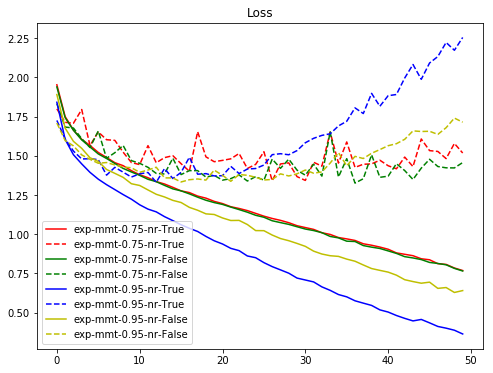

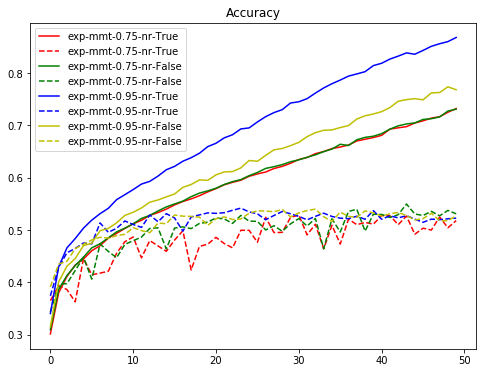

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()